In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
%env BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/

env: BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
env: BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/


In [3]:
%cd ..
from tdv import TDV, TV
%cd experiments
from data import im_dataset_bsd500
from unrolled_fb import UnrolledFB

/home/zaccharie/workspace/tf-tdv
/home/zaccharie/workspace/tf-tdv/experiments


In [4]:
!pip install tensorflow-addons

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow_addons.callbacks import TQDMProgressBar

In [6]:
train_ds = im_dataset_bsd500(batch_size=4, noise_std=40)

In [15]:
model = UnrolledFB(TDV, {'n_macro': 2, 'n_filters': 8, 'activation_str': 'relu'}, init_step_size=0.0001, n_iter=10)
# model = UnrolledFB(TV, {}, init_step_size=0.0001, n_iter=20)

In [16]:
model.compile(loss='mse', optimizer='adam')

In [17]:
%%time
data = next(iter(train_ds))

CPU times: user 160 ms, sys: 6.89 ms, total: 167 ms
Wall time: 60.6 ms


In [18]:
## overfitting
model.fit(x=data[0][0:1], y=data[1][0:1], epochs=3000, batch_size=1, callbacks=[TQDMProgressBar()], verbose=0)

Epoch 1/3000



Epoch 2/3000



Epoch 3/3000



Epoch 4/3000



Epoch 5/3000



Epoch 6/3000



Epoch 7/3000



Epoch 8/3000



Epoch 9/3000



Epoch 10/3000



Epoch 11/3000



Epoch 12/3000



Epoch 13/3000



Epoch 14/3000



Epoch 15/3000



Epoch 16/3000



Epoch 17/3000



Epoch 18/3000



Epoch 19/3000



Epoch 20/3000



Epoch 21/3000



Epoch 22/3000



Epoch 23/3000



Epoch 24/3000



Epoch 25/3000



Epoch 26/3000



Epoch 27/3000



Epoch 28/3000



Epoch 29/3000



Epoch 30/3000



Epoch 31/3000



Epoch 32/3000



Epoch 33/3000



Epoch 34/3000



Epoch 35/3000



Epoch 36/3000



Epoch 37/3000



Epoch 38/3000



Epoch 39/3000



Epoch 40/3000



Epoch 41/3000



Epoch 42/3000



Epoch 43/3000



Epoch 44/3000



Epoch 45/3000



Epoch 46/3000



Epoch 47/3000



Epoch 48/3000



Epoch 49/3000



Epoch 50/3000



Epoch 51/3000



Epoch 52/3000



Epoch 53/3000



Epoch 54/3000



Epoch 55/3000



Epoch 56/3000



Epoch 57/3000



Epoch 58/3000



Epoch 59/3000



Epoch 60/3000



Epoch 61/3000



Epoch 62/3000



Epoch 63/3000



Epoch 64/3000



Epoch 65/3000



Epoch 66/3000



Epoch 67/3000



Epoch 68/3000



Epoch 69/3000



Epoch 70/3000



Epoch 71/3000



Epoch 72/3000



Epoch 73/3000



Epoch 74/3000



Epoch 75/3000



Epoch 76/3000



Epoch 77/3000



Epoch 78/3000



Epoch 79/3000



Epoch 80/3000



Epoch 81/3000



Epoch 82/3000



Epoch 83/3000



Epoch 84/3000



Epoch 85/3000



Epoch 86/3000



Epoch 87/3000



Epoch 88/3000



Epoch 89/3000



Epoch 90/3000



Epoch 91/3000



Epoch 92/3000



Epoch 93/3000



Epoch 94/3000



Epoch 95/3000



Epoch 96/3000



Epoch 97/3000



Epoch 98/3000



Epoch 99/3000



Epoch 100/3000



Epoch 101/3000



Epoch 102/3000



Epoch 103/3000



Epoch 104/3000



Epoch 105/3000



Epoch 106/3000



Epoch 107/3000



Epoch 108/3000



Epoch 109/3000



Epoch 110/3000



Epoch 111/3000



Epoch 112/3000



Epoch 113/3000



Epoch 114/3000



Epoch 115/3000



Epoch 116/3000



Epoch 117/3000



Epoch 118/3000



Epoch 119/3000



Epoch 120/3000



Epoch 121/3000



Epoch 122/3000



Epoch 123/3000



Epoch 124/3000



Epoch 125/3000



Epoch 126/3000



Epoch 127/3000



Epoch 128/3000



Epoch 129/3000



Epoch 130/3000



Epoch 131/3000



Epoch 132/3000



Epoch 133/3000



Epoch 134/3000



Epoch 135/3000



Epoch 136/3000



Epoch 137/3000



Epoch 138/3000



Epoch 139/3000



Epoch 140/3000



Epoch 141/3000



Epoch 142/3000



Epoch 143/3000



Epoch 144/3000



Epoch 145/3000



Epoch 146/3000



Epoch 147/3000



Epoch 148/3000



Epoch 149/3000



Epoch 150/3000



Epoch 151/3000



Epoch 152/3000



Epoch 153/3000



Epoch 154/3000



Epoch 155/3000



Epoch 156/3000



Epoch 157/3000



Epoch 158/3000



Epoch 159/3000



Epoch 160/3000



Epoch 161/3000



Epoch 162/3000



Epoch 163/3000



Epoch 164/3000



Epoch 165/3000



Epoch 166/3000



Epoch 167/3000



Epoch 168/3000



Epoch 169/3000



Epoch 170/3000



Epoch 171/3000



Epoch 172/3000



Epoch 173/3000



Epoch 174/3000



Epoch 175/3000



Epoch 176/3000



Epoch 177/3000



Epoch 178/3000



Epoch 179/3000



Epoch 180/3000



Epoch 181/3000



Epoch 182/3000



Epoch 183/3000



Epoch 184/3000



Epoch 185/3000



Epoch 186/3000



Epoch 187/3000



Epoch 188/3000



Epoch 189/3000



Epoch 190/3000



Epoch 191/3000



Epoch 192/3000



Epoch 193/3000



Epoch 194/3000



Epoch 195/3000



Epoch 196/3000



Epoch 197/3000



Epoch 198/3000



Epoch 199/3000



Epoch 200/3000



Epoch 201/3000



Epoch 202/3000



Epoch 203/3000



Epoch 204/3000



Epoch 205/3000



Epoch 206/3000



Epoch 207/3000



Epoch 208/3000



Epoch 209/3000



Epoch 210/3000



Epoch 211/3000



Epoch 212/3000



Epoch 213/3000



Epoch 214/3000



Epoch 215/3000



Epoch 216/3000



Epoch 217/3000



Epoch 218/3000



Epoch 219/3000



Epoch 220/3000



Epoch 221/3000



Epoch 222/3000



Epoch 223/3000



Epoch 224/3000



Epoch 225/3000



Epoch 226/3000



Epoch 227/3000



Epoch 228/3000



Epoch 229/3000



Epoch 230/3000



Epoch 231/3000



Epoch 232/3000



Epoch 233/3000



Epoch 234/3000



Epoch 235/3000



Epoch 236/3000



Epoch 237/3000



Epoch 238/3000



Epoch 239/3000



Epoch 240/3000



Epoch 241/3000



Epoch 242/3000



Epoch 243/3000



Epoch 244/3000



Epoch 245/3000



Epoch 246/3000



Epoch 247/3000



Epoch 248/3000



Epoch 249/3000



Epoch 250/3000



Epoch 251/3000



Epoch 252/3000



Epoch 253/3000



Epoch 254/3000



Epoch 255/3000



Epoch 256/3000



Epoch 257/3000



Epoch 258/3000



Epoch 259/3000



Epoch 260/3000



Epoch 261/3000



Epoch 262/3000



Epoch 263/3000



Epoch 264/3000



Epoch 265/3000



Epoch 266/3000



Epoch 267/3000



Epoch 268/3000



Epoch 269/3000



Epoch 270/3000



Epoch 271/3000



Epoch 272/3000



Epoch 273/3000



Epoch 274/3000



Epoch 275/3000



Epoch 276/3000



Epoch 277/3000



Epoch 278/3000



Epoch 279/3000



Epoch 280/3000



Epoch 281/3000



Epoch 282/3000



Epoch 283/3000



Epoch 284/3000



Epoch 285/3000



Epoch 286/3000



Epoch 287/3000



Epoch 288/3000



Epoch 289/3000



Epoch 290/3000



Epoch 291/3000



Epoch 292/3000



Epoch 293/3000



Epoch 294/3000



Epoch 295/3000



Epoch 296/3000



Epoch 297/3000



Epoch 298/3000



Epoch 299/3000



Epoch 300/3000



Epoch 301/3000



Epoch 302/3000



Epoch 303/3000



Epoch 304/3000



Epoch 305/3000



Epoch 306/3000



Epoch 307/3000



Epoch 308/3000



Epoch 309/3000



Epoch 310/3000



Epoch 311/3000



Epoch 312/3000



Epoch 313/3000



Epoch 314/3000



Epoch 315/3000



Epoch 316/3000



Epoch 317/3000



Epoch 318/3000



Epoch 319/3000



Epoch 320/3000



Epoch 321/3000



Epoch 322/3000



Epoch 323/3000



Epoch 324/3000



Epoch 325/3000



Epoch 326/3000



Epoch 327/3000



Epoch 328/3000



Epoch 329/3000



Epoch 330/3000



Epoch 331/3000



Epoch 332/3000



Epoch 333/3000



Epoch 334/3000



Epoch 335/3000



Epoch 336/3000



Epoch 337/3000



Epoch 338/3000



Epoch 339/3000



Epoch 340/3000



Epoch 341/3000



Epoch 342/3000



Epoch 343/3000



Epoch 344/3000



Epoch 345/3000



Epoch 346/3000



Epoch 347/3000



Epoch 348/3000



Epoch 349/3000



Epoch 350/3000



Epoch 351/3000



Epoch 352/3000



Epoch 353/3000



Epoch 354/3000



Epoch 355/3000



Epoch 356/3000



Epoch 357/3000



Epoch 358/3000



Epoch 359/3000



Epoch 360/3000



Epoch 361/3000



Epoch 362/3000



Epoch 363/3000



Epoch 364/3000



Epoch 365/3000



Epoch 366/3000



Epoch 367/3000



Epoch 368/3000



Epoch 369/3000



Epoch 370/3000



Epoch 371/3000



Epoch 372/3000



Epoch 373/3000



Epoch 374/3000



Epoch 375/3000



Epoch 376/3000



Epoch 377/3000



Epoch 378/3000



Epoch 379/3000



Epoch 380/3000



Epoch 381/3000



Epoch 382/3000



Epoch 383/3000



Epoch 384/3000



Epoch 385/3000



Epoch 386/3000



Epoch 387/3000



Epoch 388/3000



Epoch 389/3000



Epoch 390/3000



Epoch 391/3000



Epoch 392/3000



Epoch 393/3000



Epoch 394/3000



Epoch 395/3000



Epoch 396/3000



Epoch 397/3000



Epoch 398/3000



Epoch 399/3000



Epoch 400/3000



Epoch 401/3000



Epoch 402/3000



Epoch 403/3000



Epoch 404/3000



Epoch 405/3000



Epoch 406/3000



Epoch 407/3000



Epoch 408/3000



Epoch 409/3000



Epoch 410/3000



Epoch 411/3000



Epoch 412/3000



Epoch 413/3000



Epoch 414/3000



Epoch 415/3000



Epoch 416/3000



Epoch 417/3000



Epoch 418/3000



Epoch 419/3000



Epoch 420/3000



Epoch 421/3000



Epoch 422/3000



Epoch 423/3000



Epoch 424/3000



Epoch 425/3000



Epoch 426/3000



Epoch 427/3000



Epoch 428/3000



Epoch 429/3000



Epoch 430/3000



Epoch 431/3000



Epoch 432/3000



Epoch 433/3000



Epoch 434/3000



Epoch 435/3000



Epoch 436/3000



Epoch 437/3000



Epoch 438/3000



Epoch 439/3000



Epoch 440/3000



Epoch 441/3000



Epoch 442/3000



Epoch 443/3000



Epoch 444/3000



Epoch 445/3000



Epoch 446/3000



Epoch 447/3000



Epoch 448/3000



Epoch 449/3000



Epoch 450/3000



Epoch 451/3000



Epoch 452/3000



Epoch 453/3000



Epoch 454/3000



Epoch 455/3000



Epoch 456/3000



Epoch 457/3000



Epoch 458/3000



Epoch 459/3000



Epoch 460/3000



Epoch 461/3000



Epoch 462/3000



Epoch 463/3000



Epoch 464/3000



Epoch 465/3000



Epoch 466/3000



Epoch 467/3000



Epoch 468/3000



Epoch 469/3000



Epoch 470/3000



Epoch 471/3000



Epoch 472/3000



Epoch 473/3000



Epoch 474/3000



Epoch 475/3000



Epoch 476/3000



Epoch 477/3000



Epoch 478/3000



Epoch 479/3000



Epoch 480/3000



Epoch 481/3000



Epoch 482/3000



Epoch 483/3000



Epoch 484/3000



Epoch 485/3000



Epoch 486/3000



Epoch 487/3000



Epoch 488/3000



Epoch 489/3000



Epoch 490/3000



Epoch 491/3000



Epoch 492/3000



Epoch 493/3000



Epoch 494/3000



Epoch 495/3000



Epoch 496/3000



Epoch 497/3000



Epoch 498/3000



Epoch 499/3000



Epoch 500/3000



Epoch 501/3000



Epoch 502/3000



Epoch 503/3000



Epoch 504/3000



Epoch 505/3000



Epoch 506/3000



Epoch 507/3000



Epoch 508/3000



Epoch 509/3000



Epoch 510/3000



Epoch 511/3000



Epoch 512/3000



Epoch 513/3000



Epoch 514/3000



Epoch 515/3000



Epoch 516/3000



Epoch 517/3000



Epoch 518/3000



Epoch 519/3000



Epoch 520/3000



Epoch 521/3000



Epoch 522/3000



Epoch 523/3000



Epoch 524/3000



Epoch 525/3000



Epoch 526/3000



Epoch 527/3000



Epoch 528/3000



Epoch 529/3000



Epoch 530/3000



Epoch 531/3000



Epoch 532/3000



Epoch 533/3000



Epoch 534/3000



Epoch 535/3000



Epoch 536/3000



Epoch 537/3000



Epoch 538/3000



Epoch 539/3000



Epoch 540/3000



Epoch 541/3000



Epoch 542/3000



Epoch 543/3000



Epoch 544/3000



Epoch 545/3000



Epoch 546/3000



Epoch 547/3000



Epoch 548/3000



Epoch 549/3000



Epoch 550/3000



Epoch 551/3000



Epoch 552/3000



Epoch 553/3000



Epoch 554/3000



Epoch 555/3000



Epoch 556/3000



Epoch 557/3000



Epoch 558/3000



Epoch 559/3000



Epoch 560/3000



Epoch 561/3000



Epoch 562/3000



Epoch 563/3000



Epoch 564/3000



Epoch 565/3000



Epoch 566/3000



Epoch 567/3000



Epoch 568/3000



Epoch 569/3000



Epoch 570/3000



Epoch 571/3000



Epoch 572/3000



Epoch 573/3000



Epoch 574/3000



Epoch 575/3000



Epoch 576/3000



Epoch 577/3000



Epoch 578/3000



Epoch 579/3000



Epoch 580/3000



Epoch 581/3000


KeyboardInterrupt: 

In [ ]:
# Use a checkpoint cback in the future
# model.save_weights('denoising_unrolled_fb_tdv.h5')

In [19]:
model.alpha, model.lamda

(<tf.Variable 'alpha:0' shape=(1,) dtype=float32, numpy=array([0.01033522], dtype=float32)>,
 <tf.Variable 'lambda:0' shape=(1,) dtype=float32, numpy=array([-0.], dtype=float32)>)

In [20]:
res = model(data[0])
res_gt = model(data[1])

<IPython.core.display.Javascript object>


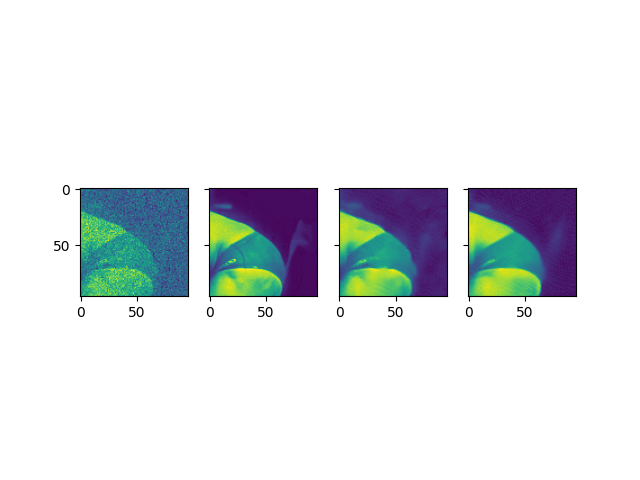

In [21]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
axs[0].imshow(np.squeeze(data[0][0]))
axs[1].imshow(np.squeeze(data[1][0]))
axs[2].imshow(np.squeeze(res[0]))
axs[3].imshow(np.squeeze(res_gt[0]))

In [14]:
# model.fit(train_ds, epochs=int(1e3//400), steps_per_epoch=400)